In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# Step 1: Load and preprocess MNIST data
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype("float32")
x_train = (x_train - 127.5) / 127.5  # scale to [-1, 1]

# Step 2: Build Generator
# Input: random noise → Output: fake image
def make_generator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation="relu", input_dim=100))
    model.add(layers.Dense(784, activation="tanh"))  # 28*28 pixels
    return model

# Step 3: Build Discriminator
# Input: image → Output: real (1) or fake (0)
def make_discriminator():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation="relu", input_dim=784))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

# Step 4: Combine into GAN (Generator + Discriminator)
generator = make_generator()
discriminator = make_discriminator()

discriminator.trainable = False  # Freeze while training GAN
gan_input = tf.keras.Input(shape=(100,))
fake_image = generator(gan_input)
gan_output = discriminator(fake_image)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")

# Step 5: Training Loop
epochs = 1000
batch_size = 128

for epoch in range(epochs):
    # --- Train Discriminator ---
    # Get real images
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]
    
    # Generate fake images
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_imgs = generator.predict(noise, verbose=0)
    
    # Train on real and fake
    d_loss_real = discriminator.train_on_batch(real_imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(fake_imgs, np.zeros((batch_size, 1)))
    
    # --- Train Generator ---
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
    
    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss_real[0]+d_loss_fake[0]:.4f} | G Loss: {g_loss:.4f}")

Epoch 0 | D Loss: 1.4815 | G Loss: 0.7850
Epoch 100 | D Loss: 9.6484 | G Loss: 0.0144
Epoch 200 | D Loss: 10.2320 | G Loss: 0.0073
Epoch 300 | D Loss: 10.5026 | G Loss: 0.0049
Epoch 400 | D Loss: 10.6937 | G Loss: 0.0037
Epoch 500 | D Loss: 10.8491 | G Loss: 0.0029
Epoch 600 | D Loss: 10.9823 | G Loss: 0.0025
Epoch 700 | D Loss: 11.1016 | G Loss: 0.0021
Epoch 800 | D Loss: 11.2100 | G Loss: 0.0018
Epoch 900 | D Loss: 11.3125 | G Loss: 0.0016


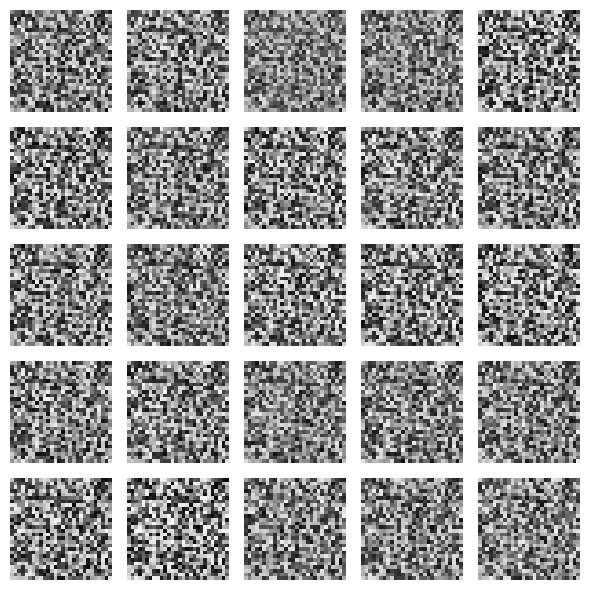

In [3]:
#Generate and visualize images
#➤ After training, use random noise to generate fake images with the trained generator.
#➤ Reshape and display the generated images using matplotlib.pyplot.imshow().

import matplotlib.pyplot as plt

def plot_generated_images(generator, examples=25, dim=(5,5), figsize=(6,6)):
    noise = np.random.normal(0, 1, (examples, 100))
    gen_imgs = generator.predict(noise, verbose=0)
    # Rescale images  from [-1,1] to [0,1]
    gen_imgs = (gen_imgs + 1.0) / 2.0
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(gen_imgs[i].reshape(28,28), cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_generated_images(generator, examples=25, dim=(5,5))